In [1]:
import numpy as np

In [3]:
# import import_ipynb
# from MyLibrary import *

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

Q1.

In [6]:
def fixed_point(funct,x1,tol,iter=1000):
    xi=x1
    xj=funct(x1)
    i=0
    while np.abs(xj-xi)>=tol:
        xi=xj
        xj=funct(xi)
        i+=1
        if i==iter:
            print("!!Convergence not achieved!! Please change the function!!")
            break
    return(xi)

In [7]:
def func1(x):
    return(np.exp(-x))

In [8]:
fixed_point(func1,100,0.0001)

0.567186050099357

Q2

In [9]:
def func2(x):
    return(np.sqrt(1+x**4))

In [10]:
def gaussianQuad(funct,a,b,n=32):
    x,w=np.polynomial.legendre.leggauss(n)  #get roots and weights of Legendre polynomials
    x=(b-a)*x*0.5+(b+a)*0.5                 #scale to (0,1)
    Int=0.5*(b-a)*np.sum(w*funct(x))        #get integral
    return(Int)

In [11]:
gaussianQuad(func2,0,1,10)

1.089429413225362

In [12]:
INT_SIMP(func2,0,1,N=100)

NameError: name 'INT_SIMP' is not defined

Q3

In [13]:
def func3(x,y):
    return((5*x**2-y)/(np.exp(x+y)))

In [14]:
H=[0.5,0.2,0.05,0.01]
df = pd.DataFrame()
for i in H:
    X_a,Y_a=RK4(func3,1.0, 0, i, 1000*i)
    column_name = f'Step size = {i}'
    df[column_name] = Y_a

print(df.to_markdown())        #View as a scrollable element or open in a text editor


NameError: name 'RK4' is not defined

Q4

In [15]:
def func4(x):
    return(4*x-0.5*x**2)



In [16]:
def crank_nicholson(funct,a,b,alpha,nx,nt):
    x=np.linspace(a,b,num=nx)
    U_0=funct(x)
    B=np.diag(np.full(nx,2))-np.diag(np.ones(nx-1),1)-np.diag(np.ones(nx-1),-1)
    I=np.diag(np.full(nx,1))
    M=np.matmul(np.linalg.inv(2*I+alpha*B),(2*I-alpha*B))         #currently we use the readily available matrix inversion algorithm from numpy
    S=np.linalg.matrix_power(M, nt)
    return(np.matmul(S,U_0),x)
def cn_data(funct,a,b,alpha,nx,at,pt):
    X=np.linspace(a,b,num=nx)
    dt=(alpha/4)*((b-a)/nx)**2                                    #4 comes from the differential equation
    T=pt*dt
    Y=np.arange(at,T,dt)
    (X,Y)=np.meshgrid(X,Y)
    Z=[]
    for j in np.arange(0,pt):
        z,x=crank_nicholson(funct,a,b,alpha,nx,j)
        Z.append(z)
    return(X,Y,Z)
def contourplot(x,y,z):
    fig1, ax2 = plt.subplots(layout='constrained')
    CS = ax2.contourf(X, Y, Z, 100, cmap=plt.cm.bone)

    CS2 = ax2.contour(CS, levels=CS.levels[::10], colors='r')

    ax2.set_title('Solution of heat equation')
    ax2.set_xlabel('x-axis')
    ax2.set_ylabel('t-axis')
    cbar = fig1.colorbar(CS)
    cbar.ax.set_ylabel('Heat')
    cbar.add_lines(CS2)

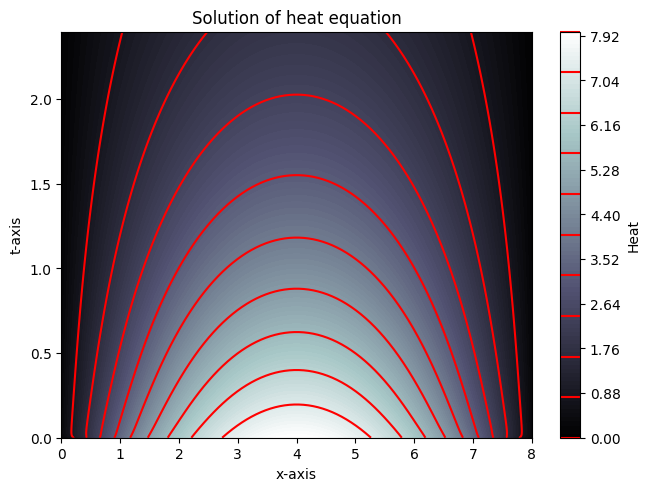

In [17]:
X,Y,Z=cn_data(func4,0,8,0.3,100,0,5000)     # alpha is kept below 0.5
contourplot(X,Y,Z)

In [18]:
print('x points are in columns and time points are in rows.')
print(pd.DataFrame(Z,index=np.transpose(Y)[0],columns=X[0]).to_markdown())  #View as a scrollable element or open in a text editor

x points are in columns and time points are in rows.


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

Q4

In [24]:
def functop(x):
    return(x*np.exp(1))
def funcbottom(x):
    return(x)
def funcleft(y):
    return(0)
def funcright(y):
    return(2*np.exp(y))


In [25]:
def funcrho(x,y):
    return(x*np.exp(y))

In [26]:
def poisonsolver(xa,xb,ya,yb,n,plot=True):
    x0=np.linspace(xa,xb,num=n)
    y0=np.linspace(ya,yb,num=n)
    h=(yb-ya)/(n-1)                                         #calculate h_y
    W=np.zeros((n,n))
    alpha=((xb-xa)/(yb-ya))**2                              #calculate alpha
    W[0]=funcbottom(x0)
    W[n-1]=functop(x0)
    for i in range(n):
        W[i][0]=funcleft(y0[i])
        W[i][n-1]=funcright(y0[i])                           #set_boundary conditions
    n2=n-2
    R=np.zeros((n2,n2))
    for i in range(n2):
        for j in range(n2):
            R[i][j]=-alpha*funcrho(x0[i+1],y0[j+1])*h**2
    R=np.transpose(R)                                        #get rho
    N2=n2**2
    B=np.zeros((n2,n2))
    B[0]=W[0][1:-1]
    B[n2-1]=W[n-1][1:-1]                                     #get contributions from boundary conditions
    for i in range(n2):
        B[i][0]+=alpha*W[i+1][0]
        B[i][n2-1]+=alpha*W[i+1][n-1]
    A=np.diag(np.full(N2,2+2*alpha))-alpha*np.diag(np.ones(N2-1),1)-alpha*np.diag(np.ones(N2-1),-1)-np.diag(np.ones(N2-n2),n2)-np.diag(np.ones(N2-n2),-n2)
    for i in range(1,n2):
        A[n2*i-1][n2*i]=0
        A[n2*i][n2*i-1]=0                                    #prepare (n-2)*(n-2) dim matrix
    Ainv=np.linalg.inv(A)                                    #invert it
    rho=B-R        
    u=np.dot(Ainv,rho.flatten())                             #get dot product
    matrix = u.reshape((n2,n2))                       
    for i in range(n2):
        for j in range(n2):
            W[i+1][j+1]=matrix[i][j]                        #get the (x,y) table
    if plot==True:                                          #get plot
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        X,Y=np.meshgrid(x0,y0)
        surf = ax.plot_surface(X, Y, W, cmap=plt.cm.viridis,
                       linewidth=0, antialiased=True)
        ax.set_ylabel('y')
        ax.set_xlabel('x')
        ax.set_title('Solution of Poisson equation')
        plt.show()
    return(W)

y points are in columns and x points are in rows.


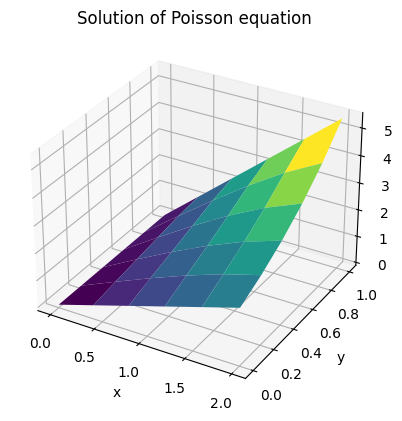

,0,1,2,3,4,5
0,0.0,0.400000,0.800000,1.200000,1.600000,2.000000
1,0.0,0.559062,1.102373,1.612571,2.068650,2.442806
2,0.0,0.702959,1.380857,2.007108,2.552319,2.983649
3,0.0,0.851623,1.674970,2.439382,3.109599,3.644238
4,0.0,0.996774,1.971592,2.898590,3.742728,4.451082
5,0.0,1.087313,2.174625,3.261938,4.349251,5.436564


In [27]:
print('y points are in columns and x points are in rows.')
pd.DataFrame(poisonsolver(0,2,0,1,6))